In [1]:
import pandas as pd
import numpy as np
import pickle

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import hdbscan
import umap

In [40]:
pipe = Pipeline([('DimReduction', 
                  umap.UMAP(
                      n_neighbors=25,
                      min_dist=0.9,
                      n_components=10,
                      random_state=1)),
                 ('Clustering', 
                 hdbscan.HDBSCAN(min_cluster_size=100,
                                min_samples=50,
                                cluster_selection_epsilon=1.0,
                                cluster_selection_method='leaf'))
                ])

In [48]:
def get_str(alg):
    the_str = str(alg)
    #the_str = the_str.replace(' ', '_')
    the_str = the_str.replace('(', '_')
    the_str = the_str.replace(')', '')
    the_str = the_str.replace('=', '__')
    the_str = the_str.replace(',', '_')
    the_str = the_str.replace('\n', '')
    for x in range(30):
        the_str = the_str.replace(' ', '')
    the_str = the_str.replace('[', '')
    the_str = the_str.replace(']', '')
    the_str = the_str.replace("'", '')
    the_str = the_str.replace("DimReduction", '')
    the_str = the_str.replace("Clustering", '')
    the_str = the_str.replace("Pipeline_steps", '')
    the_str = the_str.replace("dens_frac__0.0_dens_lambda__0.0", '')
    the_str = the_str.replace("____", '__')
    the_str = the_str.replace("__UMAP_", 'UMAP_')
    return the_str
    
get_str(pipe)

'UMAP__min_dist__0.9_n_components__10_n_neighbors__25_random_state__1___HDBSCAN_cluster_selection_epsilon__1.0_cluster_selection_method__leaf_min_cluster_size__100_min_samples__50'

In [2]:
from Commen_Functions import get_score, get_score_df, merge_Results, load_sets
import pickle

df, df_normalized, Type_df = load_sets(1)
results_grid = {}

# clustersHDDC, results_grid['hddc'], bic_df = merge_Results('/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/',
#                                                        'HDDC', df_normalized)
# # SAVE
# with open('/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/Merged_results.pkl', 'wb') as f:
#     pickle.dump(results_grid, f, protocol=pickle.HIGHEST_PROTOCOL)
# with open('/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/Merged_GridHDDC.pkl', 'wb') as f:
#     pickle.dump(bic_df, f, protocol=pickle.HIGHEST_PROTOCOL)
# with open('/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/MergedClustersHDDC.pkl', 'wb') as f:
#     pickle.dump(clustersHDDC, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/Merged_results.pkl', 'rb') as f:
    results_grid = pickle.load(f)

ImportError: cannot import name 'Gridsearch' from 'Gridsearch.Main' (/home/g0017139/UMCG_Thesis/Working_Code/Gridsearch/Main.py)

In [80]:
bic_df = bic_df.groupby('K').first().reset_index()
bic_df['K'] = bic_df['K'].astype('int')

In [83]:
results_grid['hddc'] = pd.merge(results_grid['hddc'], bic_df, left_on="n_clusters", right_on='K')

In [84]:
results_grid['hddc'] = results_grid['hddc'].sort_values('n_clusters')

In [85]:
results_grid['hddc']

,n_clusters,silhouette_score_euclidean,silhouette_score_correlation,silhouette_score_manhattan,calinski_harabasz_score,K,model,threshold,LL,BIC,ICL,rank,complexity
0,2,0.105046,0.100257,0.111406,67.637558,2,1.0,0.01,-2.344247e+07,-5.304252e+07,-5.304252e+07,1,883109.0
1,3,0.098069,0.086517,0.101042,49.970344,3,1.0,0.10,-2.508192e+07,-5.372283e+07,-5.372283e+07,2,510424.0
2,4,0.047396,0.108036,0.064936,49.366318,4,1.0,0.10,-2.406654e+07,-5.442940e+07,-5.442940e+07,4,903009.0
3,5,0.036925,0.090075,0.050502,39.756188,5,1.0,0.20,-2.499235e+07,-5.450216e+07,-5.450216e+07,6,647886.0
4,6,0.027680,0.066232,0.040619,34.105577,6,1.0,0.20,-2.440000e+07,-5.523369e+07,-5.523369e+07,10,922710.0
5,7,0.043128,0.083040,0.053666,31.857787,7,1.0,0.10,-2.438255e+07,-5.519900e+07,-5.519900e+07,9,922740.0
6,8,0.036311,0.059701,0.048868,29.819742,8,1.0,0.20,-2.443128e+07,-5.570724e+07,-5.570724e+07,14,981654.0
7,9,0.034830,0.082354,0.043443,28.433376,9,1.0,0.20,-2.443249e+07,-5.680481e+07,-5.680481e+07,16,1138718.0
8,10,0.036191,0.075339,0.040754,26.278133,10,1.0,0.20,-2.473113e+07,-5.617035e+07,-5.617035e+07,15,962064.0
9,12,0.041096,0.082778,0.047593,24.977840,12,1.0,0.20,-2.387493e+07,-5.883801e+07,-5.883801e+07,21,1590246.0


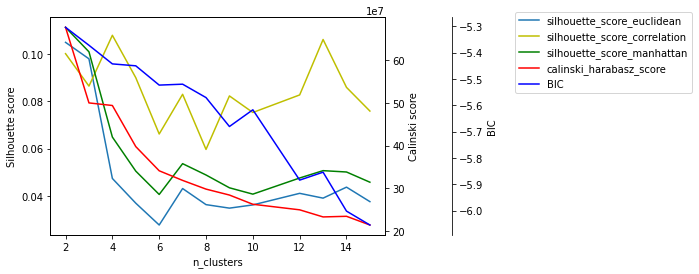

In [95]:
ax = results_grid['hddc'].plot(x='n_clusters', y="silhouette_score_euclidean", legend=False)
results_grid['hddc'].plot(x='n_clusters', y="silhouette_score_correlation",color="y", legend=False, ax=ax)
results_grid['hddc'].plot(x='n_clusters', y="silhouette_score_manhattan",color="g", legend=False, ax=ax)
ax2 = ax.twinx()
results_grid['hddc'].plot(x="n_clusters", y="calinski_harabasz_score", ax=ax2, legend=False, color="r")
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.2))
results_grid['hddc'].plot(x="n_clusters", y="BIC", ax=ax3, legend=False, color="b")
ax.figure.legend(bbox_to_anchor=(1.2, 0.9), loc=2, borderaxespad=0.)
#ax.figure.legend(bbox_to_anchor=(1.20, 0.5), loc=2, borderaxespad=0.)
ax.set_ylabel("Silhouette score")
ax2.set_ylabel("Calinski score")
ax3.set_ylabel("BIC")

plt.show()

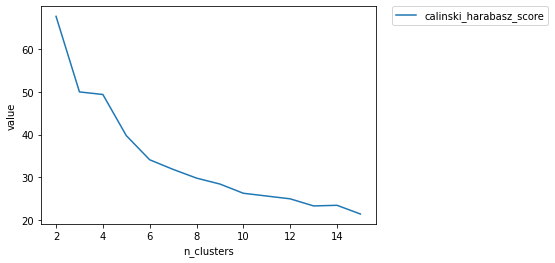

In [29]:
plot_df = results_grid['hddc'].melt(id_vars='n_clusters')
plot_df = plot_df[plot_df['variable'] == 'calinski_harabasz_score']
sns.lineplot(data=plot_df, x="n_clusters", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [20]:
plot_df.head()

,n_clusters,variable,value
0,9,silhouette_score_euclidean,0.034830
1,5,silhouette_score_euclidean,0.036925
2,8,silhouette_score_euclidean,0.036311
3,14,silhouette_score_euclidean,0.043717
4,6,silhouette_score_euclidean,0.027680


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from Commen_Functions import get_score, load_sets

In [4]:
df, df_normalized, Type_df = load_sets(1)

In [245]:
from distinctipy import distinctipy
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def make_colors(df):
    cluster_colors = distinctipy.get_colors(max(15, len(set(df['Type']))),
                                colorblind_type='Deuteranomaly', n_attempts=10_000)
    cluster_colors = ['#%02x%02x%02x' % tuple((np.array(x)  * 250).astype(int)) for x in cluster_colors]

    color_mapper = dict(zip(set(df['Type']), cluster_colors))
    palette = []
    for key in sorted(color_mapper):
        palette.append(color_mapper[key])
    palette = sns.color_palette(palette)
    return cluster_colors, color_mapper, palette

In [246]:
def make_countplot(df, x, hue, pallete): 
    pallette = sns.set_palette(pallete)
    # Make the figure
    fig = plt.figure(figsize=(10,8))
    df = df.sort_values(hue)
    g = sns.countplot(x=x, hue=hue, palette=pallette, edgecolor=".6", 
                      data=df)
    g.get_legend().remove()
    g.set_title('Absoulte counts')
    
    fig2 = plt.figure(figsize=(12,8))
    counts = (df.groupby([hue])[x]
              .value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(hue))
    g1 = sns.barplot(x=x, y="percentage", hue=hue,
                     data=counts, palette=pallette, edgecolor=".6")

    g1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g1.set_title('Relative counts')
    return fig, fig2

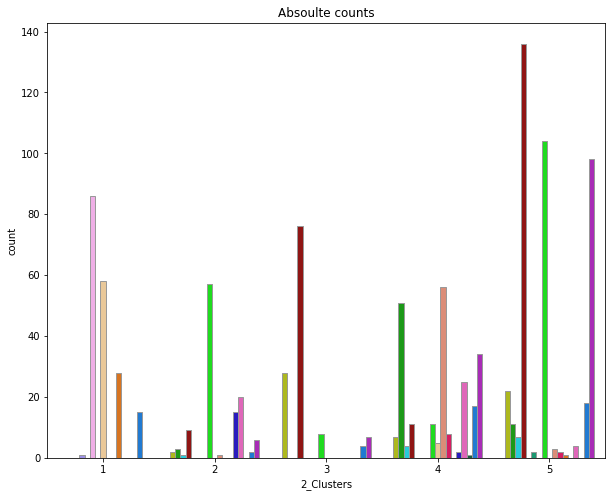

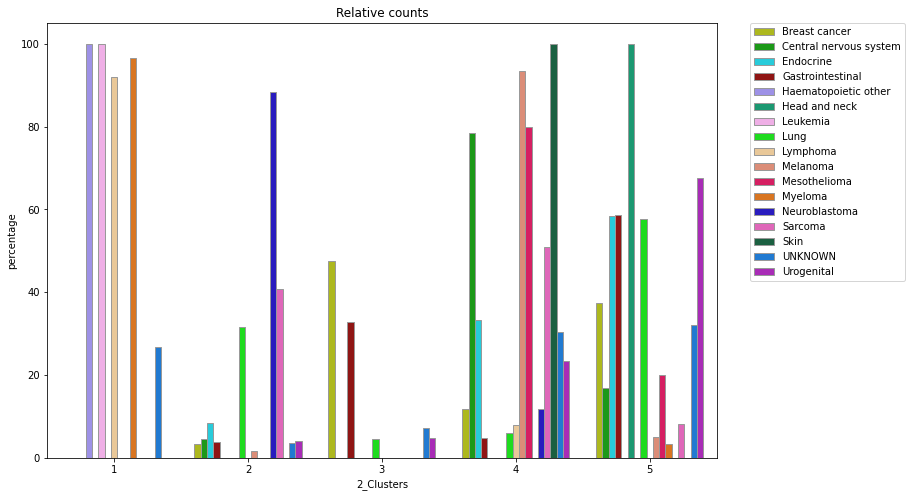

In [250]:
cluster_df = pd.read_csv("/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/HDDCClusters5.csv", index_col=0)
cluster_df.columns = ['2_Clusters']
cluster_df['Type'] = df['TYPE'].values
cluster_df = cluster_df.fillna('UNKNOWN')
cluster_colors, color_mapper, palette = make_colors(cluster_df)
make_countplot(cluster_df, '2_Clusters', 'Type', palette)
plt.show()

In [243]:
pd.read_csv('/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/HDDCGrid3.csv', index_col=0).T

,model,K,threshold,LL,BIC,ICL,rank,originalOrder,complexity
V1,1.0,3.0,0.10,-2.508192e+07,-5.372283e+07,-5.372283e+07,1.0,2.0,510424.0
V2,1.0,3.0,0.20,-2.591699e+07,-5.443493e+07,-5.443493e+07,2.0,3.0,373024.0
V3,1.0,3.0,0.01,-2.181119e+07,-5.730096e+07,-5.730096e+07,3.0,1.0,1961758.0


In [183]:
eigenvectors = pd.read_csv("/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/eigenvec0clusters2.csv", index_col=0)
eigenvectors = eigenvectors.abs()
eigenvectors

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
V1,0.001862,0.000995,0.002787,0.011227,0.008249,0.002663,0.002641,0.001265,0.007138,0.001481,0.006898,0.003320,0.003106,0.005792,0.006876,0.001789
V2,0.000476,0.000280,0.000560,0.000595,0.001252,0.000026,0.000183,0.000475,0.001002,0.000628,0.001758,0.003610,0.001212,0.001103,0.001761,0.001395
V3,0.018236,0.002754,0.003882,0.002416,0.008057,0.004475,0.002953,0.008577,0.007259,0.004156,0.004222,0.001424,0.000480,0.008914,0.001869,0.001519
V4,0.000265,0.004147,0.002828,0.002019,0.000044,0.001765,0.000709,0.001079,0.001473,0.001753,0.001445,0.000568,0.003053,0.004102,0.002790,0.003555
V5,0.000847,0.001621,0.001119,0.000833,0.000427,0.000323,0.000270,0.000108,0.000084,0.000565,0.000245,0.000550,0.001378,0.001221,0.000187,0.001192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V19631,0.008685,0.003262,0.005917,0.000477,0.004715,0.014360,0.008836,0.012490,0.005254,0.000550,0.003421,0.003559,0.017172,0.006876,0.013995,0.000316
V19632,0.007153,0.008997,0.009980,0.006090,0.008290,0.000535,0.005288,0.000880,0.009189,0.001463,0.009553,0.002221,0.001888,0.006349,0.006377,0.008496
V19633,0.003701,0.005194,0.001047,0.000344,0.000253,0.017522,0.004815,0.005196,0.003762,0.007977,0.006876,0.000197,0.007599,0.011182,0.003103,0.005270
V19634,0.001160,0.001247,0.000979,0.002478,0.000441,0.002714,0.000700,0.000817,0.000267,0.002379,0.003057,0.002390,0.004811,0.004908,0.000918,0.004863


In [ ]:
# Take union with cutoff

In [184]:
mapping = dict(zip(df.columns[:-3], eigenvectors.sum(axis=1).values))

In [185]:
Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)

In [186]:
Entrez_Map['Weight'] = Entrez_Map['mapped_entrez_v1'].map(mapping)
Entrez_Map['mapped_entrez_v1'] = Entrez_Map['mapped_entrez_v1'].astype(str)

In [187]:
Entrez_Map = Entrez_Map.dropna()

In [188]:
Entrez_Map = Entrez_Map.sort_values('Weight', ascending=False)

In [189]:
Entrez_Map

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping,Weight
17373,916,11,118304579.0,118316175.0,1,CD3e molecule,CD3E,118310377.0,0.286763
17377,917,11,118344343.0,118353782.0,1,CD3g molecule,CD3G,118349062.5,0.275171
16556,50852,3,108822697.0,108855005.0,1,T cell receptor associated transmembrane adapt...,TRAT1,108838851.0,0.270370
18874,100507600,2,135820190.0,135823087.0,1,uncharacterized LOC100507600,LOC100507600,135821638.5,0.262391
2740,149998,21,14108813.0,14208920.0,-1,lipase I,LIPI,14158866.5,0.260954
...,...,...,...,...,...,...,...,...,...
11698,5275,18,63587299.0,63599199.0,1,serpin family B member 13,SERPINB13,63593249.0,0.004551
22137,54578,2,233692281.5,233773299.5,1,UDP glucuronosyltransferase family 1 member A6,UGT1A6,233732790.5,0.004517
20755,11199,4,168092536.0,168187742.0,1,annexin A10,ANXA10,168140139.0,0.004216
14470,9635,1,86424170.0,86456553.0,1,chloride channel accessory 2,CLCA2,86440361.5,0.003543


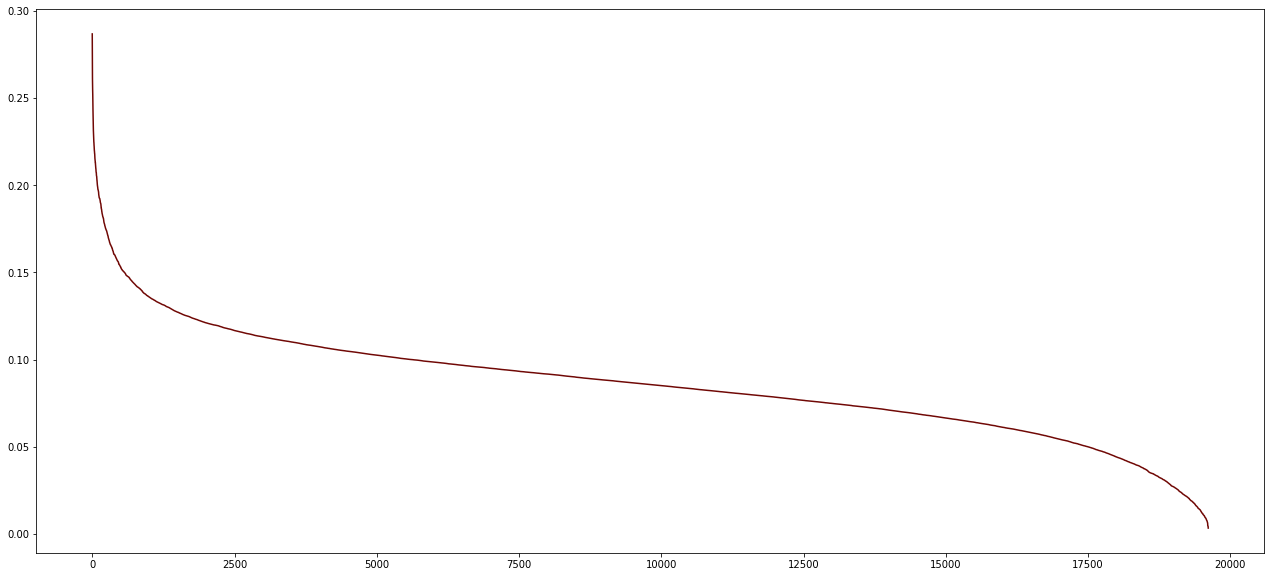

In [190]:
plt.figure(figsize=(22,10))
plt.plot(np.arange(len(Entrez_Map['Weight'])),Entrez_Map['Weight']) 
#plt.xticks(ticks=np.arange(len(Entrez_Map['Weight'])), labels=Entrez_Map['mapped_entrez_v1'])
plt.show()

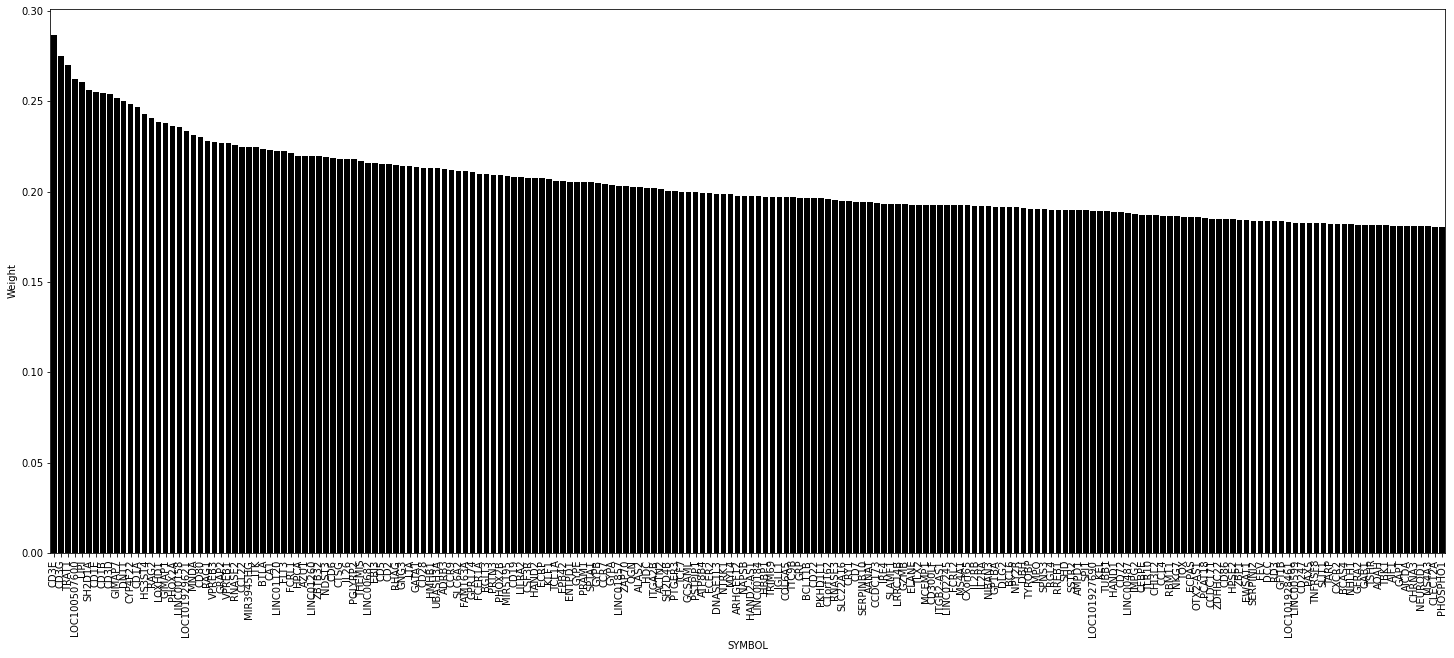

In [191]:
plt.figure(figsize=(25,10))
sns.barplot(data=Entrez_Map.head(200), x="SYMBOL", y='Weight', color='black')
plt.xticks(rotation=90)
plt.show()

In [192]:
Entrez_Map[Entrez_Map['Weight'] > 0.23]

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping,Weight
17373,916,11,118304579.0,118316175.0,1,CD3e molecule,CD3E,118310377.0,0.286763
17377,917,11,118344343.0,118353782.0,1,CD3g molecule,CD3G,118349062.5,0.275171
16556,50852,3,108822697.0,108855005.0,1,T cell receptor associated transmembrane adapt...,TRAT1,108838851.0,0.270370
18874,100507600,2,135820190.0,135823087.0,1,uncharacterized LOC100507600,LOC100507600,135821638.5,0.262391
2740,149998,21,14108813.0,14208920.0,-1,lipase I,LIPI,14158866.5,0.260954
17933,4068,23,124346281.0,124373161.0,1,SH2 domain containing 1A,SH2D1A,124359721.0,0.256438
20410,913,1,158353794.0,158357553.0,1,CD1e molecule,CD1E,158355673.5,0.255114
20409,910,1,158327949.0,158331531.0,-1,CD1b molecule,CD1B,158329740.0,0.254717
17376,915,11,118339073.0,118342744.0,-1,CD3d molecule,CD3D,118340908.5,0.253890
19800,168537,7,150514871.0,150521073.0,1,"GTPase, IMAP family member 7",GIMAP7,150517972.0,0.251818


In [193]:
# Entrez_Map[Entrez_Map['Weight'] > 0.4]['SYMBOL'].to_csv('/home/g0017139/UMCG_Thesis/Working_Code/Results/importgenes.txt', sep=' ', 
#                                      header=False, index=False)

In [194]:
print(' '.join(Entrez_Map[Entrez_Map['Weight'] > 0.23]['SYMBOL'].astype(str).values))

CD3E CD3G TRAT1 LOC100507600 LIPI SH2D1A CD1E CD1B CD3D GIMAP7 DNTT CYP4F22 CD1A HS3ST4 RAG2 LOXHD1 GIMAP1 PHOX2A LINC00158 LOC101929621 MNDA CD80


In [195]:
Entrez_Map

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping,Weight
17373,916,11,118304579.0,118316175.0,1,CD3e molecule,CD3E,118310377.0,0.286763
17377,917,11,118344343.0,118353782.0,1,CD3g molecule,CD3G,118349062.5,0.275171
16556,50852,3,108822697.0,108855005.0,1,T cell receptor associated transmembrane adapt...,TRAT1,108838851.0,0.270370
18874,100507600,2,135820190.0,135823087.0,1,uncharacterized LOC100507600,LOC100507600,135821638.5,0.262391
2740,149998,21,14108813.0,14208920.0,-1,lipase I,LIPI,14158866.5,0.260954
...,...,...,...,...,...,...,...,...,...
11698,5275,18,63587299.0,63599199.0,1,serpin family B member 13,SERPINB13,63593249.0,0.004551
22137,54578,2,233692281.5,233773299.5,1,UDP glucuronosyltransferase family 1 member A6,UGT1A6,233732790.5,0.004517
20755,11199,4,168092536.0,168187742.0,1,annexin A10,ANXA10,168140139.0,0.004216
14470,9635,1,86424170.0,86456553.0,1,chloride channel accessory 2,CLCA2,86440361.5,0.003543


In [196]:
get_cols = [int(x) for x in Entrez_Map[Entrez_Map['Weight'] > 0.23]['mapped_entrez_v1']]
get_cols.append('TYPE')

In [197]:
box_df = df[get_cols].copy()

In [198]:
box_df['Clusters'] = cluster_df['2_Clusters'].values

In [199]:
Entrez_Map[Entrez_Map['Weight'] > 0.23].shape

(22, 9)

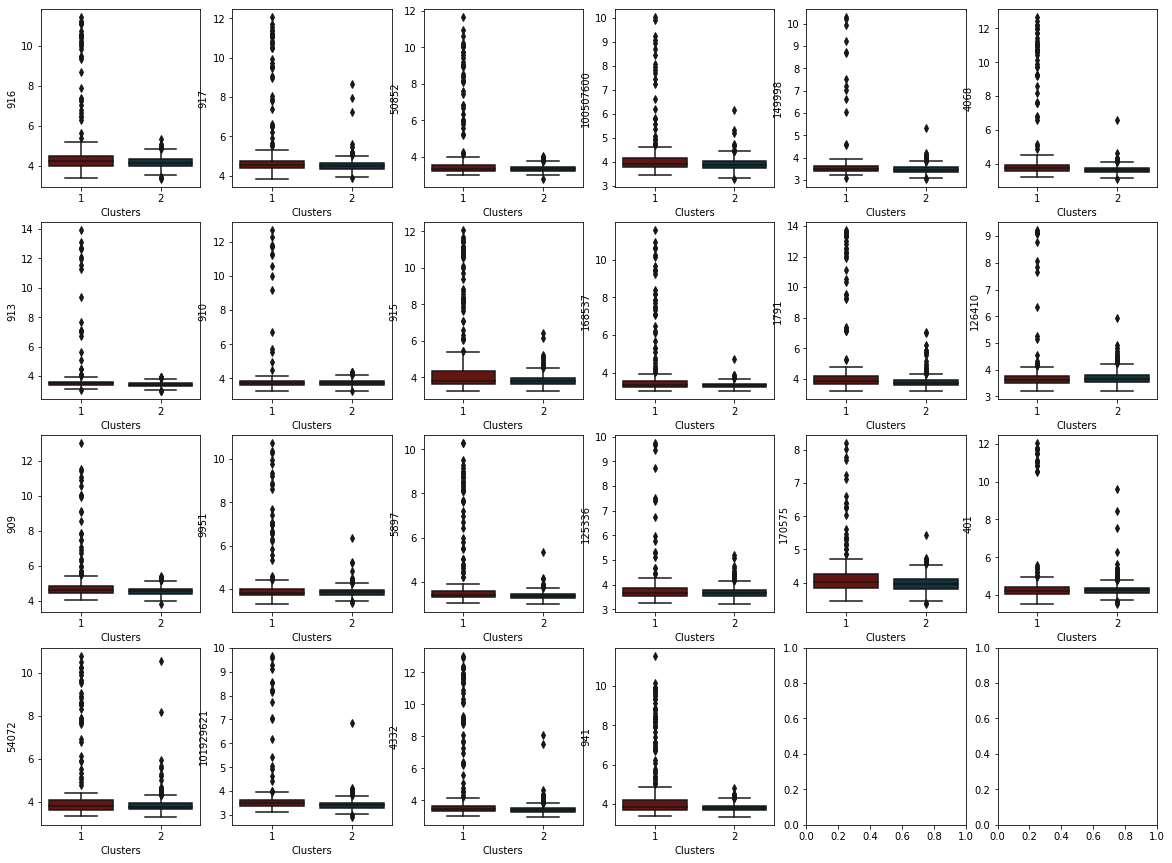

In [200]:
def make_boxplots(df):
    fig, axs = plt.subplots(4,6, figsize=(20,15))
    i = 0
    for x in axs:
        for ax in x: 
            if type(df.columns[i]) == int:
                sns.boxplot(x="Clusters", y=df.columns[i], data=df,ax=ax)
                i += 1
make_boxplots(box_df)

In [ ]:
# man withney
# Log 

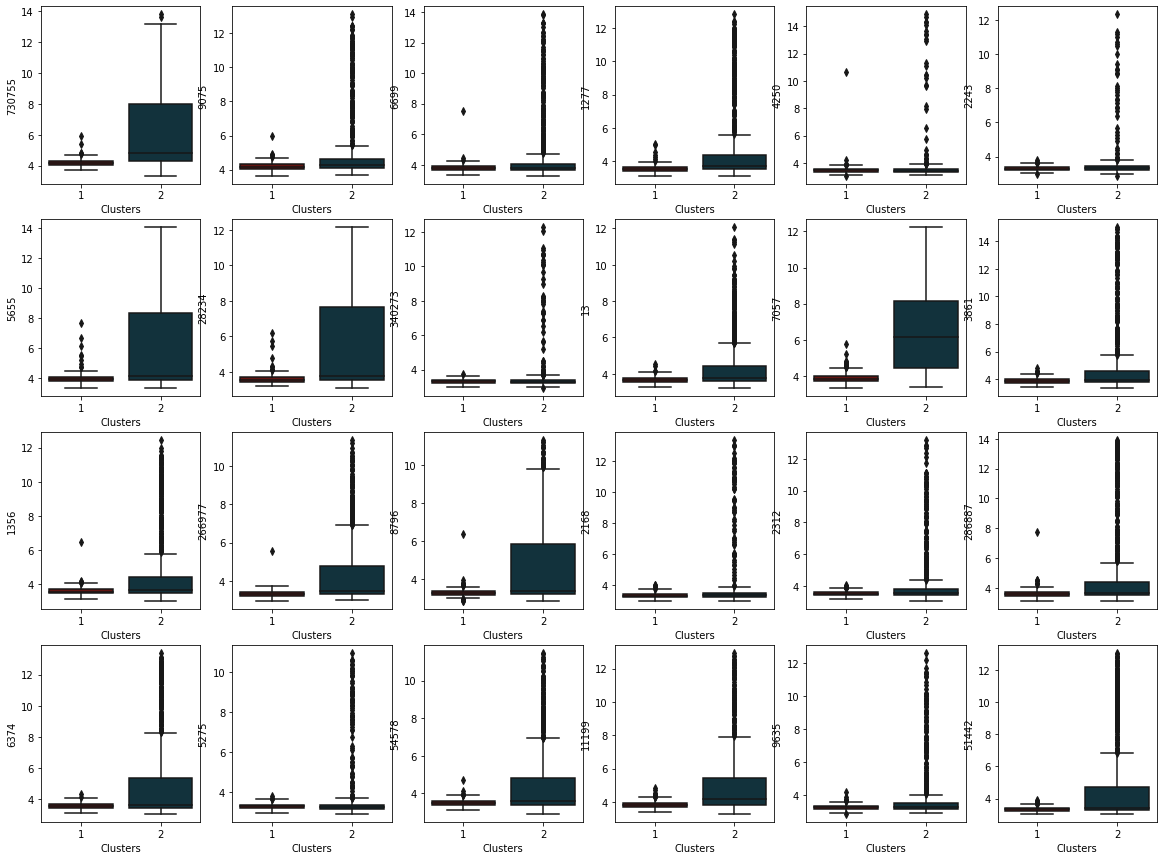

In [201]:
get_cols = [int(x) for x in Entrez_Map.tail(24)['mapped_entrez_v1']]
get_cols.append('TYPE')

box_df = df[get_cols].copy()

box_df['Clusters'] = cluster_df['2_Clusters'].values

make_boxplots(box_df)

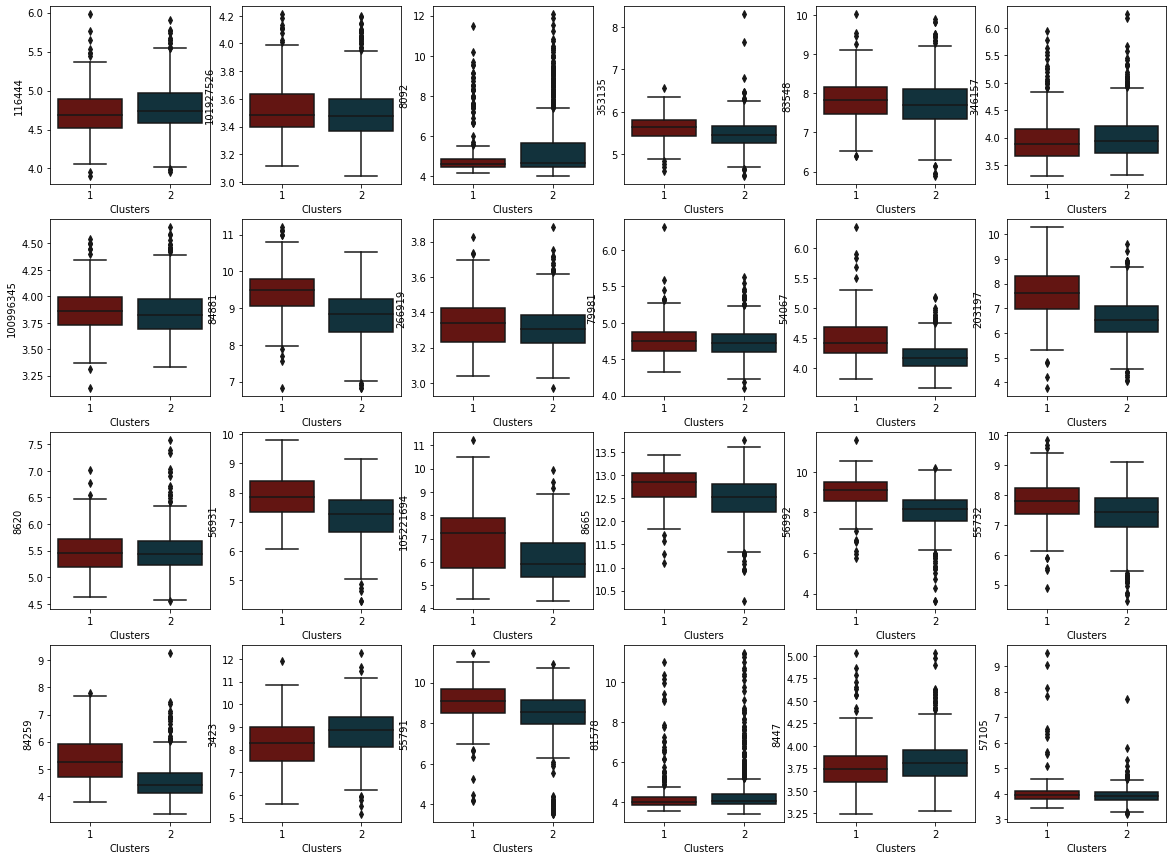

In [202]:
get_cols = [int(x) for x in Entrez_Map.iloc[9794:9818, :]['mapped_entrez_v1']]
get_cols.append('TYPE')

box_df = df[get_cols].copy()

box_df['Clusters'] = cluster_df['2_Clusters'].values

make_boxplots(box_df)

In [215]:
eigenvectors = pd.read_csv("/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/eigenvec1clusters2.csv", index_col=0)
eigenvectors = eigenvectors.abs()
eigenvectors

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27
V1,0.014836,0.000717,0.008754,0.004319,0.009675,0.003808,0.008936,0.000641,0.003128,0.006844,...,0.006631,0.002470,0.011261,0.003601,0.000926,0.004780,0.001661,0.009221,0.003787,0.006179
V2,0.009725,0.001413,0.002157,0.000680,0.020781,0.002906,0.004009,0.022566,0.003429,0.003574,...,0.003498,0.001487,0.009413,0.004051,0.001070,0.001735,0.008234,0.005741,0.005556,0.006674
V3,0.003203,0.000297,0.007142,0.003264,0.003613,0.014791,0.008069,0.004841,0.001953,0.014884,...,0.002575,0.001682,0.002133,0.008769,0.006546,0.001725,0.008361,0.001027,0.004681,0.005564
V4,0.011860,0.002973,0.002881,0.002446,0.010418,0.006912,0.015061,0.007394,0.003930,0.003691,...,0.007224,0.002977,0.016094,0.002159,0.012041,0.003331,0.004493,0.013565,0.001087,0.003228
V5,0.000385,0.003326,0.000876,0.000862,0.006805,0.005796,0.002671,0.026348,0.003556,0.004512,...,0.006837,0.001928,0.000484,0.011237,0.005093,0.011189,0.004335,0.011235,0.003924,0.006296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V19631,0.008040,0.002246,0.001255,0.002038,0.001276,0.005575,0.005796,0.004173,0.009495,0.001265,...,0.001307,0.011227,0.012534,0.010458,0.010892,0.013764,0.016132,0.000289,0.008009,0.004518
V19632,0.001243,0.010933,0.011812,0.001170,0.003136,0.004472,0.004516,0.003359,0.005922,0.004797,...,0.000414,0.016910,0.009408,0.008247,0.002105,0.000196,0.000203,0.002280,0.007939,0.010879
V19633,0.004670,0.000098,0.000991,0.004219,0.002048,0.003798,0.004518,0.008589,0.001559,0.001817,...,0.008787,0.010379,0.011321,0.014266,0.005168,0.006793,0.002450,0.002372,0.002011,0.005919
V19634,0.002983,0.000624,0.000554,0.003235,0.006140,0.000634,0.000019,0.021838,0.005181,0.006517,...,0.018870,0.005675,0.006626,0.012138,0.000361,0.000892,0.007692,0.006033,0.000692,0.001882


In [216]:
mapping = dict(zip(df.columns[:-3], eigenvectors.sum(axis=1).values))

In [217]:
Entrez_Map['mapped_entrez_v1'] = Entrez_Map['mapped_entrez_v1'].astype(int)
Entrez_Map['Weight_2'] = Entrez_Map['mapped_entrez_v1'].map(mapping)

In [218]:
Entrez_Map

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping,Weight,Weight_2
17373,916,11,118304579.0,118316175.0,1,CD3e molecule,CD3E,118310377.0,0.286763,0.045651
17377,917,11,118344343.0,118353782.0,1,CD3g molecule,CD3G,118349062.5,0.275171,0.028703
16556,50852,3,108822697.0,108855005.0,1,T cell receptor associated transmembrane adapt...,TRAT1,108838851.0,0.270370,0.025736
18874,100507600,2,135820190.0,135823087.0,1,uncharacterized LOC100507600,LOC100507600,135821638.5,0.262391,0.053680
2740,149998,21,14108813.0,14208920.0,-1,lipase I,LIPI,14158866.5,0.260954,0.035286
...,...,...,...,...,...,...,...,...,...,...
11698,5275,18,63587299.0,63599199.0,1,serpin family B member 13,SERPINB13,63593249.0,0.004551,0.260425
22137,54578,2,233692281.5,233773299.5,1,UDP glucuronosyltransferase family 1 member A6,UGT1A6,233732790.5,0.004517,0.200729
20755,11199,4,168092536.0,168187742.0,1,annexin A10,ANXA10,168140139.0,0.004216,0.202708
14470,9635,1,86424170.0,86456553.0,1,chloride channel accessory 2,CLCA2,86440361.5,0.003543,0.210662


In [219]:
Entrez_Map = Entrez_Map.dropna()

In [222]:
Entrez_Map = Entrez_Map.sort_values('Weight_2', ascending=False)

In [223]:
Entrez_Map

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping,Weight,Weight_2
15368,56889,10,96518109.0,96587012.0,-1,transmembrane 9 superfamily member 3,TM9SF3,96552560.5,0.098612,0.287356
9159,85320,16,48166910.0,48233724.0,-1,ATP binding cassette subfamily C member 11,ABCC11,48200317.0,0.016093,0.268465
20180,2266,4,154604354.0,154612779.0,-1,fibrinogen gamma chain,FGG,154608566.5,0.012477,0.262731
6253,25803,6,34537801.0,34556331.0,-1,SAM pointed domain containing ETS transcriptio...,SPDEF,34547066.0,0.038822,0.261290
11698,5275,18,63587299.0,63599199.0,1,serpin family B member 13,SERPINB13,63593249.0,0.004551,0.260425
...,...,...,...,...,...,...,...,...,...,...
2459,608,16,11965209.0,11968068.0,1,TNF receptor superfamily member 17,TNFRSF17,11966638.5,0.155850,0.011296
21665,940,2,203706556.0,203738912.0,1,CD28 molecule,CD28,203722734.0,0.213274,0.010976
21259,89857,3,183487550.0,183555706.0,-1,kelch like family member 6,KLHL6,183521628.0,0.091891,0.010859
16408,100847062,14,106850884.0,106850999.0,-1,microRNA 5195,MIR5195,106850941.5,0.208555,0.010851


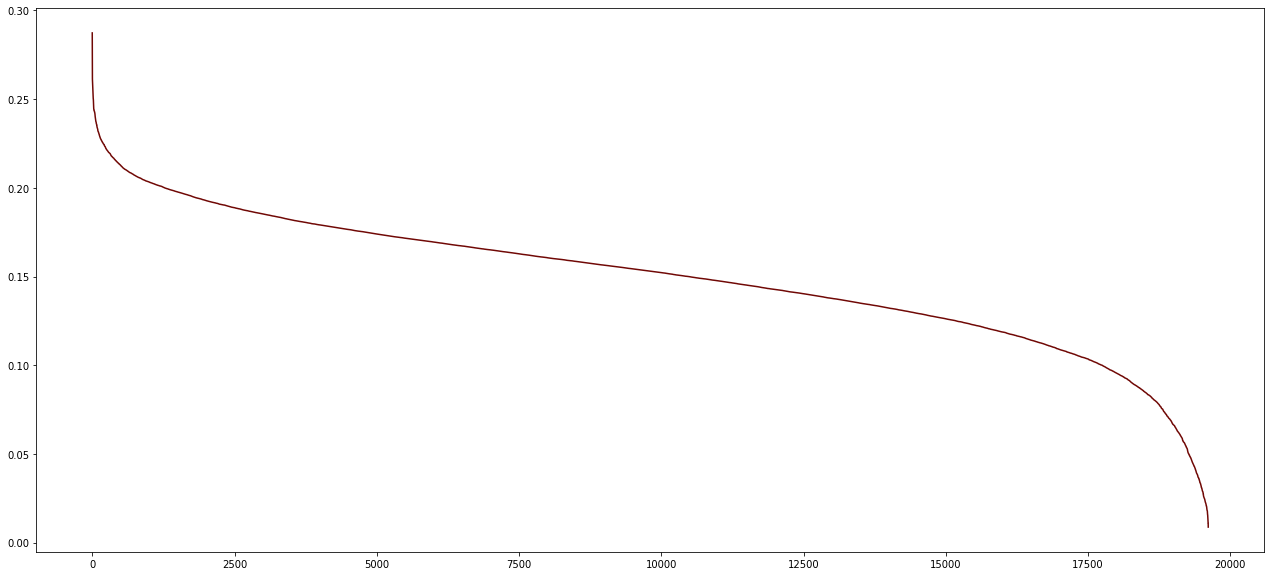

In [224]:
plt.figure(figsize=(22,10))
plt.plot(np.arange(len(Entrez_Map['Weight_2'])),Entrez_Map['Weight_2']) 
#plt.xticks(ticks=np.arange(len(Entrez_Map['Weight'])), labels=Entrez_Map['mapped_entrez_v1'])
plt.show()

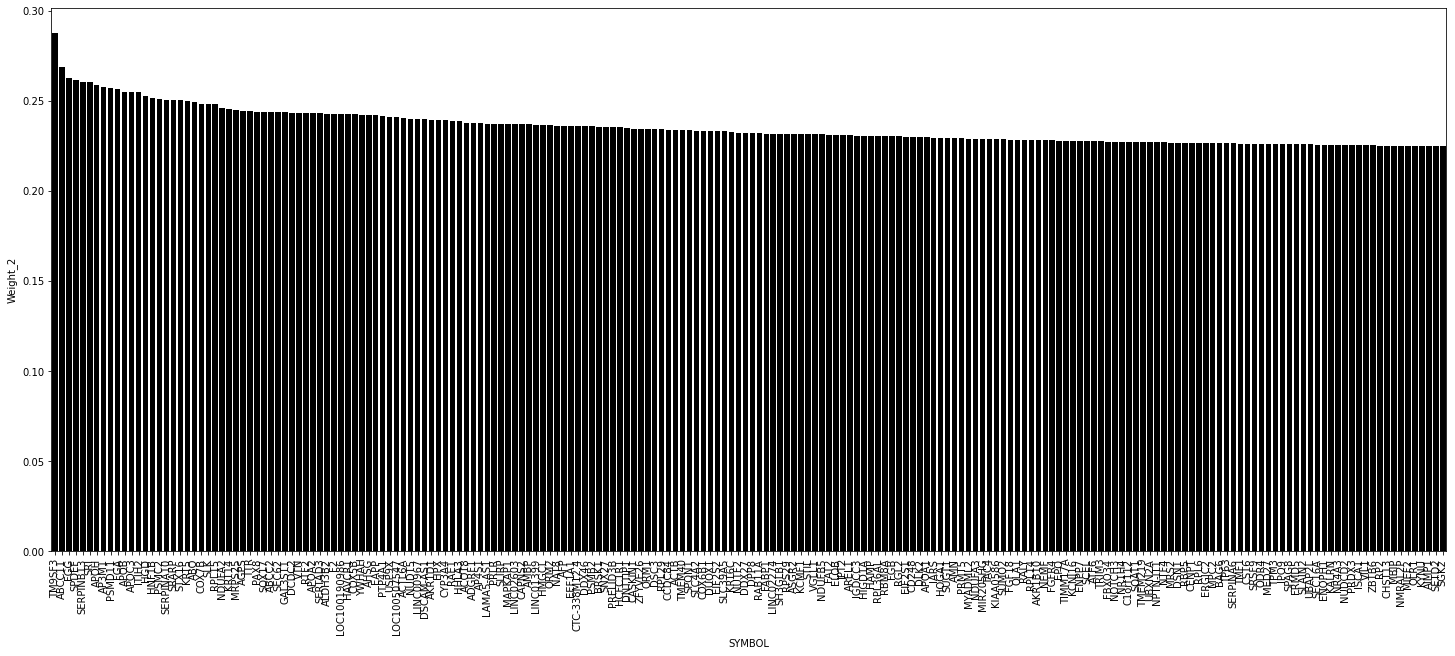

In [225]:
plt.figure(figsize=(25,10))
sns.barplot(data=Entrez_Map.head(200), x="SYMBOL", y='Weight_2', color='black')
plt.xticks(rotation=90)
plt.show()

In [231]:
Entrez_Map[Entrez_Map['Weight_2'] > 0.247].shape

(24, 10)

In [235]:
get_cols = [int(x) for x in Entrez_Map[Entrez_Map['Weight_2'] > 0.23]['mapped_entrez_v1']]
get_cols.append('TYPE')

In [236]:
box_df = df[get_cols].copy()

In [237]:
box_df['Clusters'] = cluster_df['2_Clusters'].values

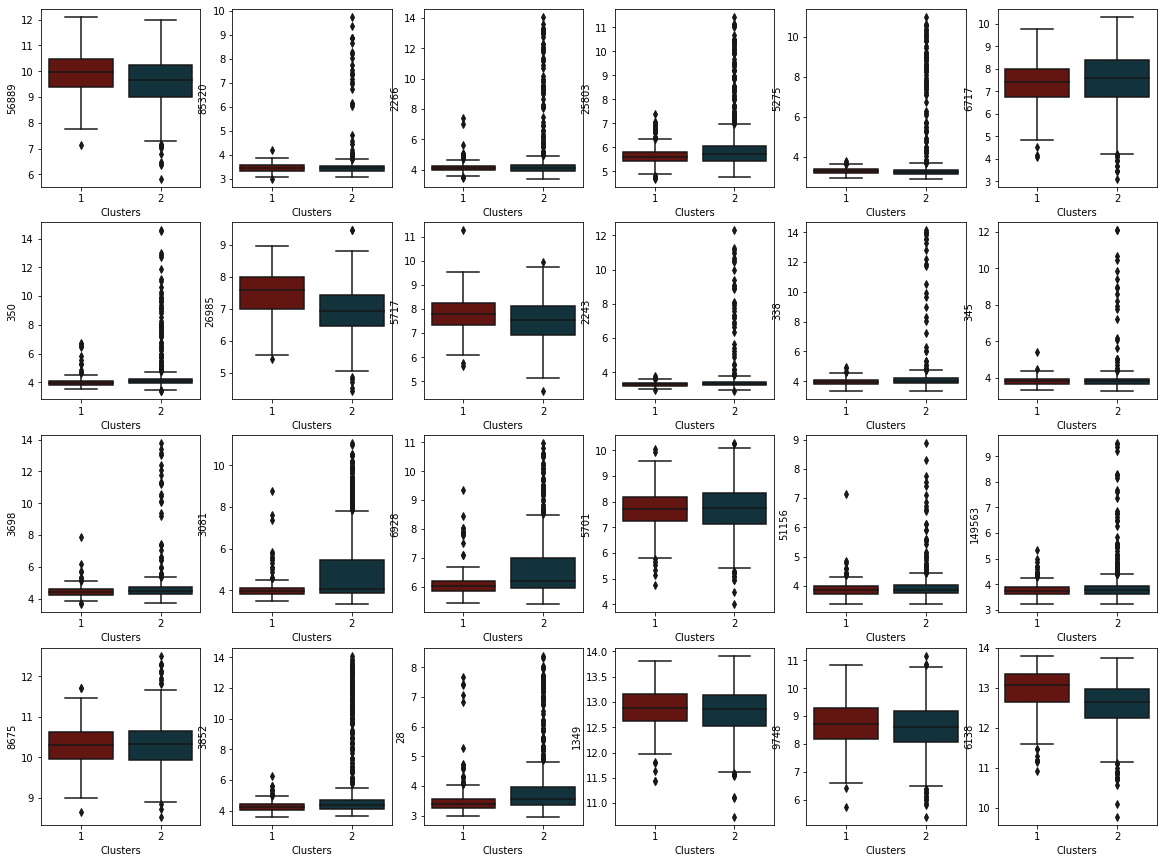

In [238]:
def make_boxplots(df):
    fig, axs = plt.subplots(4,6, figsize=(20,15))
    i = 0
    for x in axs:
        for ax in x: 
            if type(df.columns[i]) == int:
                sns.boxplot(x="Clusters", y=df.columns[i], data=df,ax=ax)
                i += 1
make_boxplots(box_df)

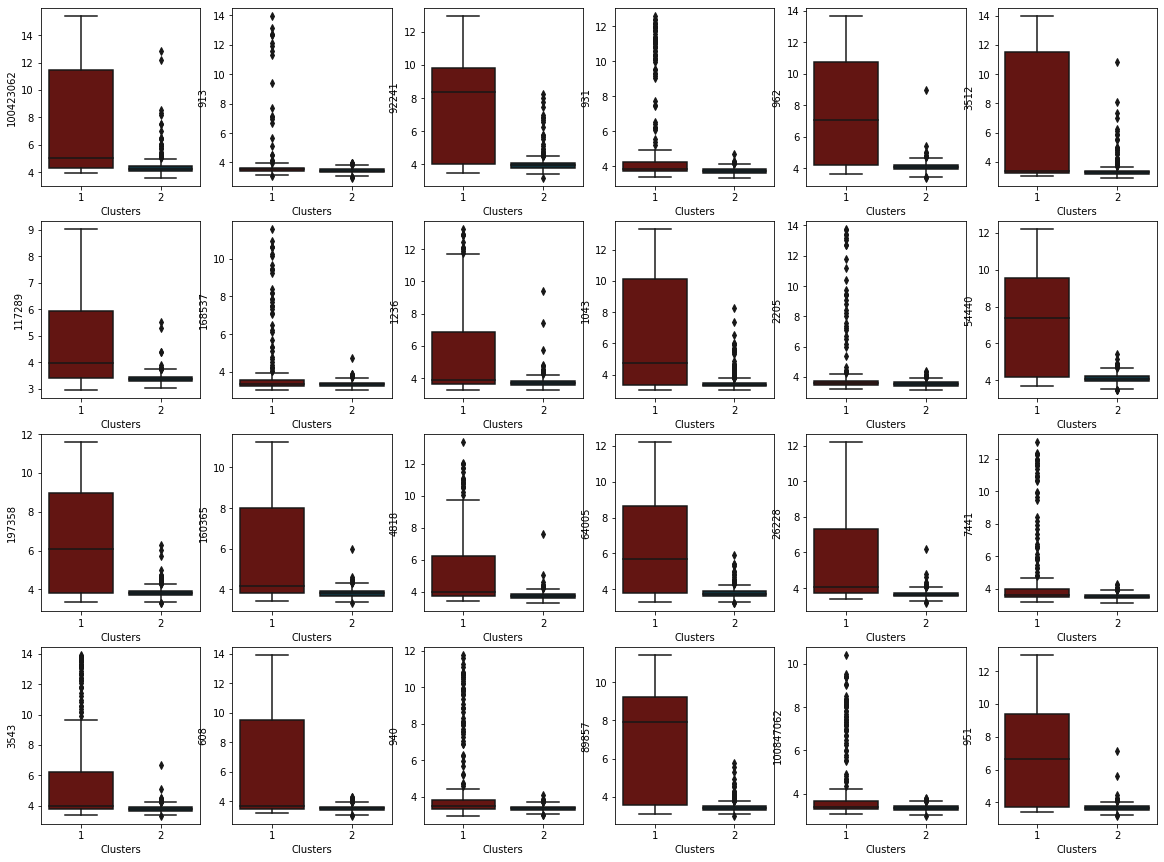

In [239]:
get_cols = [int(x) for x in Entrez_Map.tail(24)['mapped_entrez_v1']]
get_cols.append('TYPE')

box_df = df[get_cols].copy()

box_df['Clusters'] = cluster_df['2_Clusters'].values

make_boxplots(box_df)

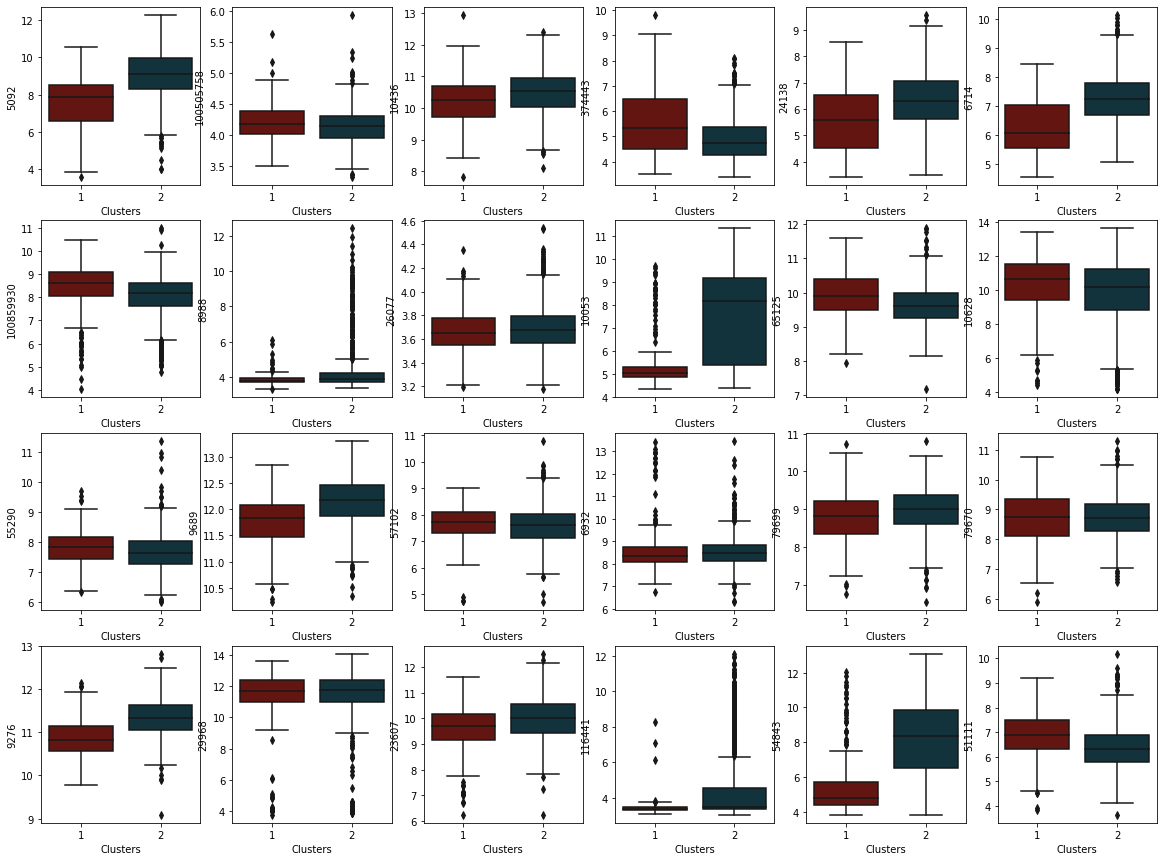

In [240]:
get_cols = [int(x) for x in Entrez_Map.iloc[9794:9818, :]['mapped_entrez_v1']]
get_cols.append('TYPE')

box_df = df[get_cols].copy()

box_df['Clusters'] = cluster_df['2_Clusters'].values

make_boxplots(box_df)